# Cargar dataset en R en python

In [1]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 5.2 MB/s eta 0:00:00


In [4]:
from google.colab import files
import pyreadr

# Sube el archivo .RData o .RDS
uploaded = files.upload()  # Selecciona el archivo hornos.R desde tu computadora

# Carga el archivo
result = pyreadr.read_r(list(uploaded.keys())[0])
# Toma el nombre del archivo subido
df = list(result.values())[0]

# Verifica el DataFrame
print(df.head())

Saving PP.RData to PP.RData
           V1         V2        V3        V4        V5         V6         V7  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   

           V8  V9  
0   74.242225   0  
1  127.393580   0  
2   63.171909   0  
3   53.593661   0  
4  252.567306   0  


In [8]:
#breve analisis descriptivo
import pandas as pd

# Renombrar columnas con nombres descriptivos según la descripción del examen
df.columns = [
    'media_perfil_integrado',
    'std_perfil_integrado',
    'curtosis_perfil_integrado',
    'asimetria_perfil_integrado',
    'media_dm_snr',
    'std_dm_snr',
    'curtosis_dm_snr',
    'asimetria_dm_snr',
    'target'  # La última columna es la variable objetivo
]

# Confirmar los nuevos nombres de las columnas
print("Nuevos nombres de las columnas:")
print(df.columns)

# Revisar las primeras filas con los nuevos nombres
print("\nPrimeras filas del dataset con nombres descriptivos:")
print(df.head())

# Verifica la estructura inicial del DataFrame
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas del dataset:")
print(df.head())

# Análisis descriptivo
print("\nTipos de datos:")
print(df.dtypes)

print("\nResumen estadístico:")
print(df.describe())


Nuevos nombres de las columnas:
Index(['media_perfil_integrado', 'std_perfil_integrado',
       'curtosis_perfil_integrado', 'asimetria_perfil_integrado',
       'media_dm_snr', 'std_dm_snr', 'curtosis_dm_snr', 'asimetria_dm_snr',
       'target'],
      dtype='object')

Primeras filas del dataset con nombres descriptivos:
   media_perfil_integrado  std_perfil_integrado  curtosis_perfil_integrado  \
0              140.562500             55.683782                  -0.234571   
1              102.507812             58.882430                   0.465318   
2              103.015625             39.341649                   0.323328   
3              136.750000             57.178449                  -0.068415   
4               88.726562             40.672225                   0.600866   

   asimetria_perfil_integrado  media_dm_snr  std_dm_snr  curtosis_dm_snr  \
0                   -0.699648      3.199833   19.110426         7.975532   
1                   -0.515088      1.677258   14.86014

In [10]:
#reviso si tengo clases desbalanceadas en mi dataset en la columna categorica que voy a estar prediciendo
# Conteo de valores en la columna target
conteo_clases = df['target'].value_counts()

# Mostrar el conteo de clases
print("Conteo de valores en target:")
print(conteo_clases)

# Mostrar las proporciones (porcentaje de cada clase)
proporciones_clases = df['target'].value_counts(normalize=True) * 100
print("\nProporciones de clases (%):")
print(proporciones_clases)


Conteo de valores en target:
target
0    8328
1    1204
Name: count, dtype: int64

Proporciones de clases (%):
target
0    87.368863
1    12.631137
Name: proportion, dtype: float64


# EJERCICIO 1

En este ejercicio consideramos únicamente las 8 primeras variables que componen la matriz  de datos.

1-Mediante un análsis de componentes principales, graficar el porcentaje de la varianza explicada por cada componente y el porcentaje acumulado de la varianza explicada.

2- Realizar un biplot.

3-¿Qué tan informativo resulta en este caso el biplot?

4- ¿Cómo se interpretan los datos 1835, 3597  y 4561?

5-A partir del biplot interpretar la relación entre las variables.

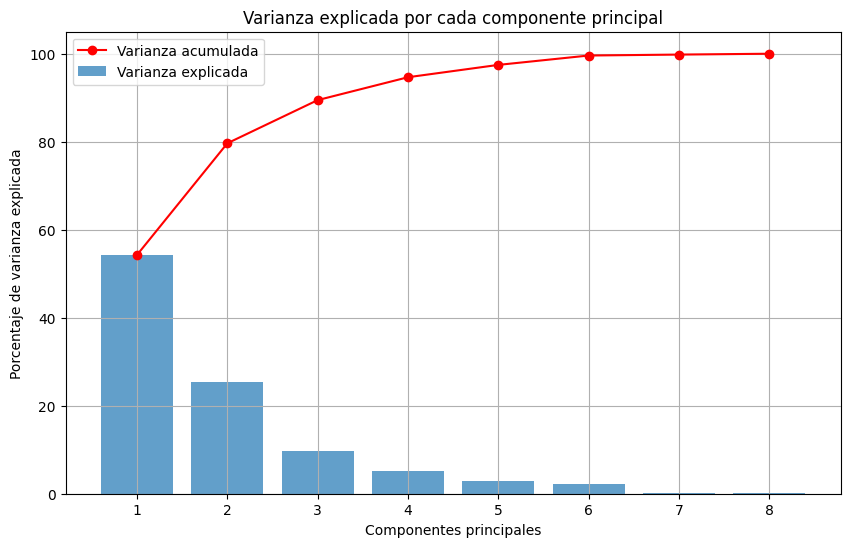

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Filtrar las 8 primeras variables (no incluir la columna 'target')
X = df.iloc[:, :8]  # Selecciona las 8 primeras columnas

# 1. Escalar los datos (es necesario para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Aplicar PCA (si no indico n_components PCA automaticamente me hace por defecto tantos componentes como dimensiones tenga en mi dataset / en este caso 8)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Gráfica del porcentaje de varianza explicada
varianza_explicada = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje
varianza_acumulada = np.cumsum(varianza_explicada)

# Graficar porcentaje de varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, label='Varianza explicada')
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='red', label='Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.legend()
plt.grid(True)
plt.show()


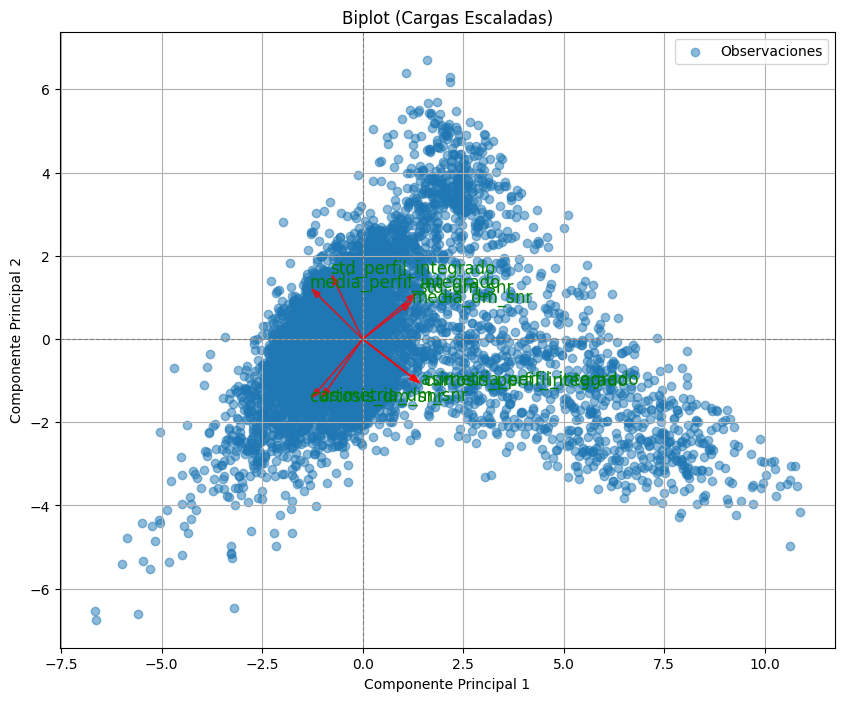

In [20]:
# 4. Crear un biplot
def biplot(score, coeff, labels=None, scale_factor=1):
    """
    Crea un biplot para PCA con opciones de escalado.
    score: Proyecciones de las observaciones en los componentes principales.
    coeff: Coeficientes de las variables originales en los componentes principales.
    labels: Nombres de las variables originales.
    scale_factor: Factor para escalar las flechas de las cargas (por defecto 3).
    """
    xs = score[:, 0]  # Primera componente
    ys = score[:, 1]  # Segunda componente
    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, alpha=0.5, label='Observaciones')

    # Escalar las cargas y añadir flechas
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0] * scale_factor, coeff[i, 1] * scale_factor,
                  color='red', alpha=0.7, head_width=0.15)
        if labels is not None:
            plt.text(coeff[i, 0] * scale_factor * 1.2, coeff[i, 1] * scale_factor * 1.2,
                     labels[i], color='green', fontsize=12)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Biplot (Cargas Escaladas)')
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.show()

# Llamar a la función biplot con un factor de escala mayor (por ejemplo, 3)
biplot(X_pca, pca.components_.T, labels=X.columns, scale_factor=3)





In [17]:
# Mostrar las cargas (coeficientes) de las variables en los primeros dos componentes principales
cargas = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
print(cargas)

     media_perfil_integrado  std_perfil_integrado  curtosis_perfil_integrado  \
PC1               -0.367509             -0.222749                   0.414810   
PC2                0.348663              0.443119                  -0.307916   
PC3               -0.033638              0.450659                   0.096547   
PC4               -0.322541              0.735978                   0.298356   
PC5                0.732754              0.041427                   0.152453   
PC6                0.057441              0.064797                   0.062026   
PC7                0.287553             -0.056227                   0.716736   
PC8                0.123665             -0.013979                   0.306566   

     asimetria_perfil_integrado  media_dm_snr  std_dm_snr  curtosis_dm_snr  \
PC1                    0.400535      0.338659    0.382566        -0.368977   
PC2                   -0.302251      0.248271    0.315005        -0.412642   
PC3                    0.090140      0.582670

In [13]:
# 5. Análisis de puntos específicos
# Observaciones a analizar
indices = [1835, 3597, 4561]  # Cambia los índices según el dataset
print("\nPuntos seleccionados en el espacio PCA:")
for idx in indices:
    print(f"Observación {idx}: PCA1 = {X_pca[idx, 0]:.4f}, PCA2 = {X_pca[idx, 1]:.4f}")

# 6. Relación entre las variables a partir del biplot
# La dirección de las flechas indica cómo cada variable se alinea con los componentes principales.
print("\nRelación entre las variables según el biplot:")
for i, var in enumerate(X.columns):
    print(f"- Variable '{var}' está más alineada con Componente {np.argmax(abs(pca.components_[:, i])) + 1}")


Puntos seleccionados en el espacio PCA:
Observación 1835: PCA1 = -1.2066, PCA2 = -0.5258
Observación 3597: PCA1 = -0.1113, PCA2 = 2.2393
Observación 4561: PCA1 = 10.8122, PCA2 = -3.5248

Relación entre las variables según el biplot:
- Variable 'media_perfil_integrado' está más alineada con Componente 5
- Variable 'std_perfil_integrado' está más alineada con Componente 4
- Variable 'curtosis_perfil_integrado' está más alineada con Componente 7
- Variable 'asimetria_perfil_integrado' está más alineada con Componente 5
- Variable 'media_dm_snr' está más alineada con Componente 6
- Variable 'std_dm_snr' está más alineada con Componente 6
- Variable 'curtosis_dm_snr' está más alineada con Componente 8
- Variable 'asimetria_dm_snr' está más alineada con Componente 3


# EJERCICIO 2

En este ejercicio consideramos únicamente las 8 primeras variables que componen la matriz  de datos. Estudiaremos la posibilidad de existencia de agrupamientos entre los mismos.

1-¿Existen indicios de agrupamiento entre las observaciones?

2-Asumiendo que existen agrupamientos entre las observaciones, indicar de acuerdo a determinado criterio en cuántos grupos es razonable separar utlizando los criterios de Silhouette, Dunn, Calinski-Harabasz, gap y Davies-Bouldin. En cada caso utilizar como métodos de agrupamiento kmeans, Ward y single.

3- Eligiendo un número de k adecuado separar en clusters usando kmeans.

4-Esbozar una conclusión general.

In [22]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import single, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [23]:
# Función para calcular el índice de Dunn
def calcular_indice_dunn(X, labels):
    """
    Calcula el Índice de Dunn: relación entre la mínima distancia entre clusters
    y la máxima dispersión dentro de un cluster.
    """
    distances = pairwise_distances(X)
    unique_labels = np.unique(labels)
    intra_cluster_distances = []
    inter_cluster_distances = []

    # Calcular dispersión máxima dentro de los clusters
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            intra_cluster_distances.append(np.max(pdist(cluster_points)))

    # Calcular distancia mínima entre clusters
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            inter_cluster_distances.append(np.min(pdist(np.vstack([cluster_i, cluster_j]))))

    dunn_index = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    return dunn_index

# Cargar y preparar los datos (primeras 8 variables)
X = df.iloc[:, :8]  # Seleccionar solo las primeras 8 columnas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escalar los datos


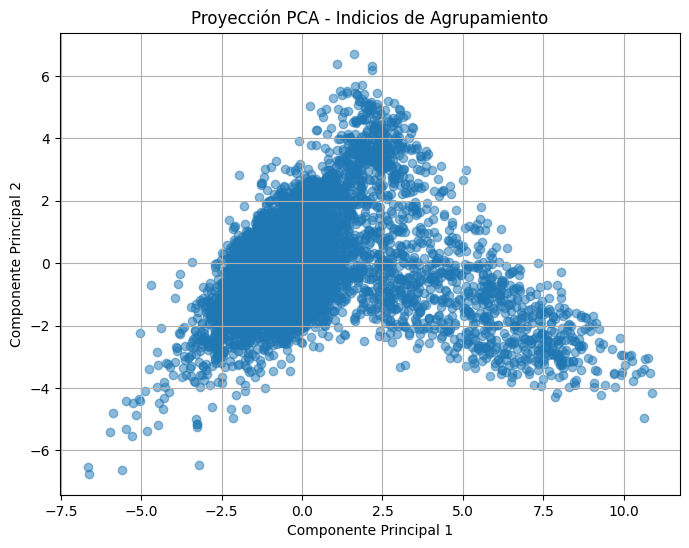

In [24]:
# 1. Identificar indicios de agrupamiento: visualizar con un scatter plot PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Proyección PCA - Indicios de Agrupamiento")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()




Método: KMeans
  - Clusters: 2 | Silhouette: 0.5850 | Índice de Dunn: 0.0028
  - Clusters: 3 | Silhouette: 0.4882 | Índice de Dunn: 0.0032
  - Clusters: 4 | Silhouette: 0.3462 | Índice de Dunn: 0.0037
  - Clusters: 5 | Silhouette: 0.3072 | Índice de Dunn: 0.0040
  - Clusters: 6 | Silhouette: 0.2777 | Índice de Dunn: 0.0041
  - Clusters: 7 | Silhouette: 0.2785 | Índice de Dunn: 0.0041
  - Clusters: 8 | Silhouette: 0.2776 | Índice de Dunn: 0.0041
  - Clusters: 9 | Silhouette: 0.2426 | Índice de Dunn: 0.0041


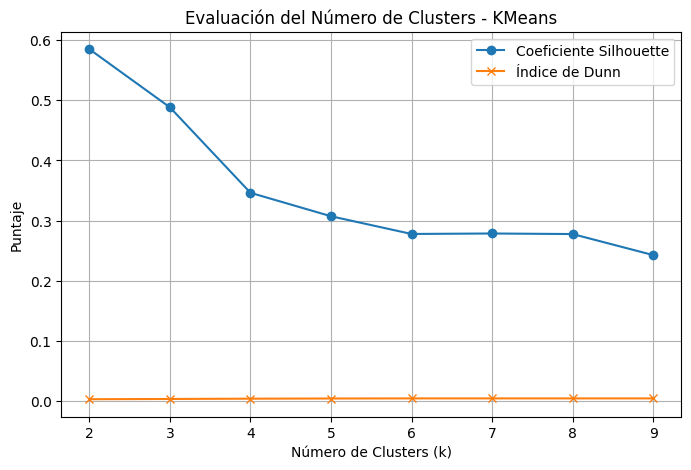


Método: Ward
  - Clusters: 2 | Silhouette: 0.6047 | Índice de Dunn: 0.0026
  - Clusters: 3 | Silhouette: 0.5668 | Índice de Dunn: 0.0030
  - Clusters: 4 | Silhouette: 0.3670 | Índice de Dunn: 0.0037
  - Clusters: 5 | Silhouette: 0.2654 | Índice de Dunn: 0.0037
  - Clusters: 6 | Silhouette: 0.2407 | Índice de Dunn: 0.0037
  - Clusters: 7 | Silhouette: 0.2341 | Índice de Dunn: 0.0037
  - Clusters: 8 | Silhouette: 0.2341 | Índice de Dunn: 0.0048
  - Clusters: 9 | Silhouette: 0.2285 | Índice de Dunn: 0.0048


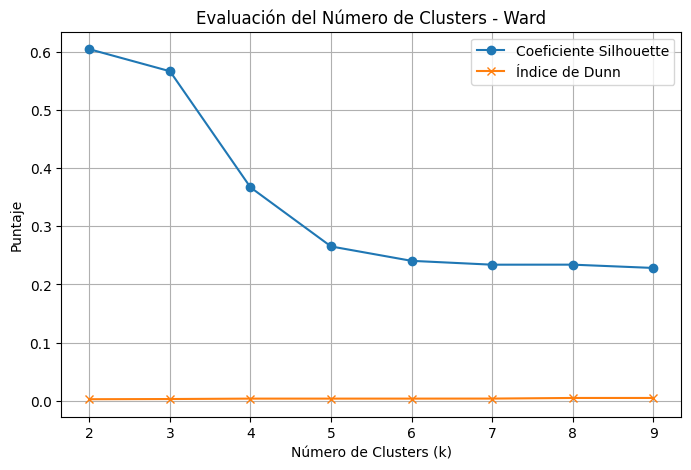


Método: Single
  - Clusters: 2 | Silhouette: 0.7351 | Índice de Dunn: 0.0023
  - Clusters: 3 | Silhouette: 0.5723 | Índice de Dunn: 0.0023
  - Clusters: 4 | Silhouette: 0.5301 | Índice de Dunn: 0.0023
  - Clusters: 5 | Silhouette: 0.5296 | Índice de Dunn: 0.0023
  - Clusters: 6 | Silhouette: 0.4710 | Índice de Dunn: 0.0023
  - Clusters: 7 | Silhouette: 0.4716 | Índice de Dunn: 0.0025
  - Clusters: 8 | Silhouette: 0.4647 | Índice de Dunn: 0.0025
  - Clusters: 9 | Silhouette: 0.4651 | Índice de Dunn: 0.0025


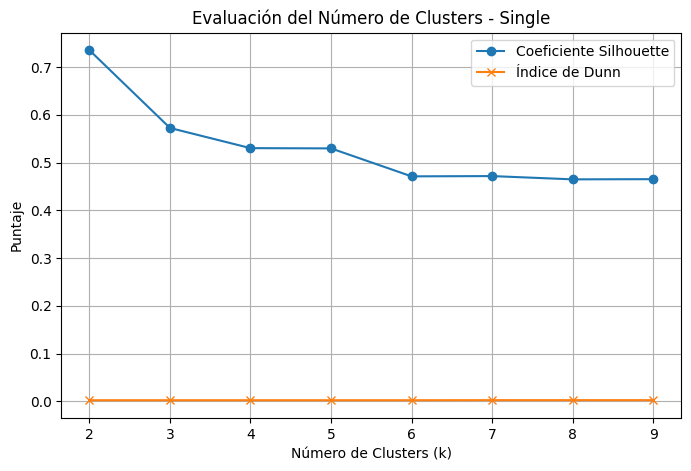

In [25]:
# 2. Evaluar el número óptimo de grupos usando criterios de Silhouette y Dunn
range_clusters = range(2, 10)  # Probar de 2 a 9 clusters
metodos = {
    "KMeans": KMeans,
    "Ward": AgglomerativeClustering,
    "Single": AgglomerativeClustering
}

# Evaluar cada método
for metodo_nombre, metodo in metodos.items():
    silhouette_scores = []
    dunn_indices = []
    print(f"\nMétodo: {metodo_nombre}")
    for k in range_clusters:
        if metodo_nombre == "KMeans":
            model = metodo(n_clusters=k, random_state=42).fit(X_scaled)
        elif metodo_nombre == "Ward":
            model = metodo(n_clusters=k, linkage='ward').fit(X_scaled)
        elif metodo_nombre == "Single":
            model = metodo(n_clusters=k, linkage='single').fit(X_scaled)

        labels = model.labels_
        silhouette = silhouette_score(X_scaled, labels)
        dunn = calcular_indice_dunn(X_scaled, labels)

        silhouette_scores.append(silhouette)
        dunn_indices.append(dunn)

        print(f"  - Clusters: {k} | Silhouette: {silhouette:.4f} | Índice de Dunn: {dunn:.4f}")

    # Graficar los resultados
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, silhouette_scores, marker='o', label='Coeficiente Silhouette')
    plt.plot(range_clusters, dunn_indices, marker='x', label='Índice de Dunn')
    plt.title(f"Evaluación del Número de Clusters - {metodo_nombre}")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Puntaje")
    plt.legend()
    plt.grid(True)
    plt.show()

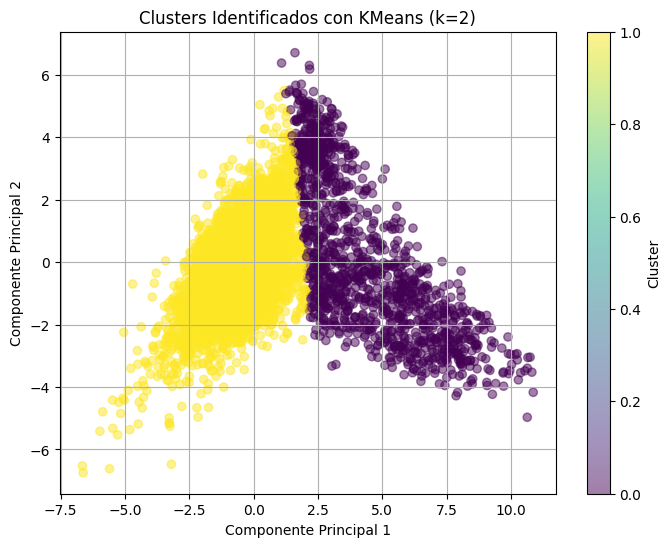


Conclusión General:
Se eligió separar en 2 clusters utilizando KMeans.
La interpretación de los clusters puede realizarse evaluando las variables originales o usando técnicas adicionales.


In [27]:
# 3. Separar en clusters usando KMeans con k óptimo
k_optimo = 2  # Ajustar esto basado en los resultados anteriores
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Visualizar los clusters usando PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.5)
plt.title(f"Clusters Identificados con KMeans (k={k_optimo})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# 4. Conclusión general
print("\nConclusión General:")
print(f"Se eligió separar en {k_optimo} clusters utilizando KMeans.")
print("La interpretación de los clusters puede realizarse evaluando las variables originales o usando técnicas adicionales.")

# EJERCICIO 3

En este ejercicio comparamos la performance predictiva de distintas metodologías aplicadas a una nueva observación.
Para ello separamos el total de observaciones en  85 por ciento de
entranamiento y el 15 por ciento restante para calcular el porcentaje de error (error rate).

1- Ajustar un modelo logístico tomando como predictores a las variables V1, V3, V5, V6 y V9 y calcular la matriz de confusión.

2- Aplicar KNN con k= 5, k=10 y calcular la matriz de confusión.

3- Aplicar LDA tomando a las variables V1, V3, V5 y V7 como predictores y calcular la matriz de confusión.

4- Aplicar QDA y tomando a las variables V2, V4, V6 y V8  como predictores calcular la matriz de confusión.

5- Aplicar naive Bayes y calcular la matriz de confusión.

6- Aplicar algún otro criterio de clasificaciòn visto en el curso.

7- Graficar las curvas ROC para los distintos métodos de clasificación utilizados.

8- Comentar los resultados obtenidos.

In [45]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Volver a asignar los nombres originales a las columnas del DataFrame
df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
# Confirmar el cambio
print("Nombres de las columnas actualizados:")
print(df.columns)

Nombres de las columnas actualizados:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'], dtype='object')


In [43]:
# 1. Volver a los nombres originales de las variables
df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'target']

# Dividir en datos de entrenamiento (85%) y prueba (15%)
X = df.iloc[:, :-1]  # Todas las variables menos 'target'
y = df['target']     # La última columna es la variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Función para evaluar modelos y mostrar matriz de confusión con etiquetas
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre_modelo):
    """
    Ajusta, predice y muestra la matriz de confusión con etiquetas y el accuracy.
    """
    modelo.fit(X_train, y_train)  # Ajustar modelo
    y_pred = modelo.predict(X_test)  # Predicción

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n--- {nombre_modelo} ---")
    print(f"Accuracy: {acc:.4f}")

    # Graficar matriz de confusión con etiquetas
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"],
                yticklabels=["Clase 0", "Clase 1"])
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()

    return y_pred, modelo

# Escalar datos para métodos que lo requieren (KNN, LDA, QDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. Regresión Logística:

--- Regresión Logística ---
Accuracy: 0.9811


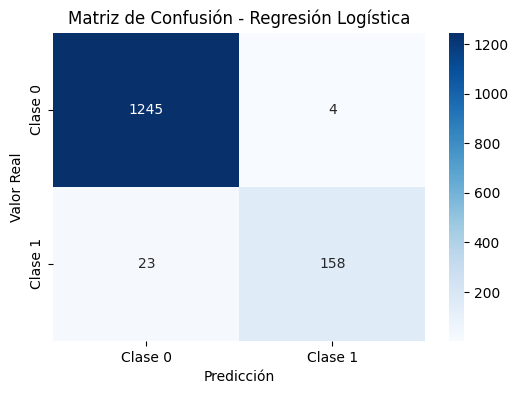

In [46]:
# 2. Regresión Logística // no uso V9 porque es la Y
print("\n1. Regresión Logística:")
X_train_log = X_train[['V1', 'V3', 'V5', 'V6']]
X_test_log = X_test[['V1', 'V3', 'V5', 'V6']]

logistic_model = LogisticRegression()
y_pred_log, logistic_model = evaluar_modelo(logistic_model, X_train_log, X_test_log, y_train, y_test, "Regresión Logística")



2. KNN:

--- KNN (k=5) ---
Accuracy: 0.9755


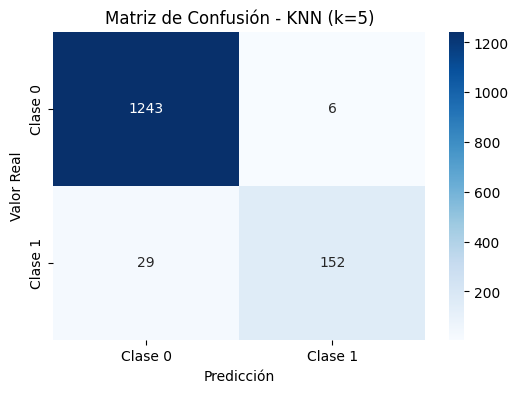


--- KNN (k=10) ---
Accuracy: 0.9762


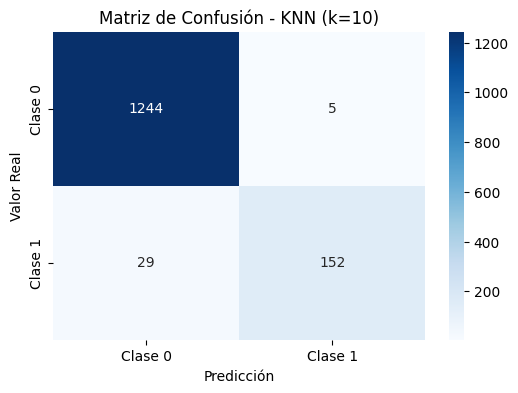

In [48]:
print("\n2. KNN:")
for k in [5, 10]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    evaluar_modelo(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, f"KNN (k={k})")



3. LDA:

--- LDA ---
Accuracy: 0.9594


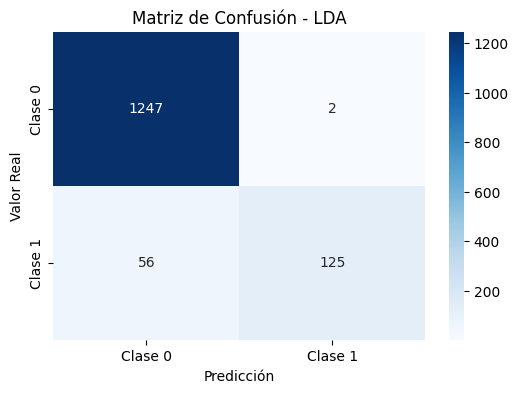

In [49]:
# 4. LDA
print("\n3. LDA:")
X_train_lda = X_train[['V1', 'V3', 'V5', 'V7']]
X_test_lda = X_test[['V1', 'V3', 'V5', 'V7']]

lda_model = LDA()
y_pred_lda, lda_model = evaluar_modelo(lda_model, X_train_lda, X_test_lda, y_train, y_test, "LDA")



4. QDA:

--- QDA ---
Accuracy: 0.9490


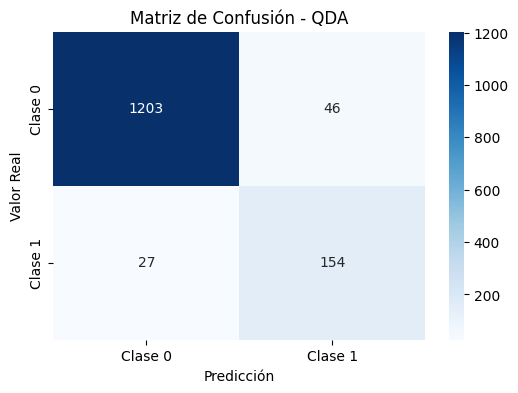

In [50]:
# 5. QDA
print("\n4. QDA:")
X_train_qda = X_train[['V2', 'V4', 'V6', 'V8']]
X_test_qda = X_test[['V2', 'V4', 'V6', 'V8']]

qda_model = QDA()
y_pred_qda, qda_model = evaluar_modelo(qda_model, X_train_qda, X_test_qda, y_train, y_test, "QDA")



5. Naive Bayes:

--- Naive Bayes ---
Accuracy: 0.9385


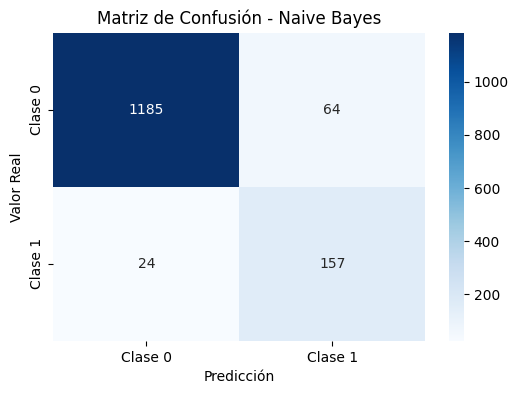

In [51]:
# 6. Naive Bayes
print("\n5. Naive Bayes:")
naive_bayes_model = GaussianNB()
y_pred_nb, naive_bayes_model = evaluar_modelo(naive_bayes_model, X_train, X_test, y_train, y_test, "Naive Bayes")



6. Random Forest:

--- Random Forest ---
Accuracy: 0.9811


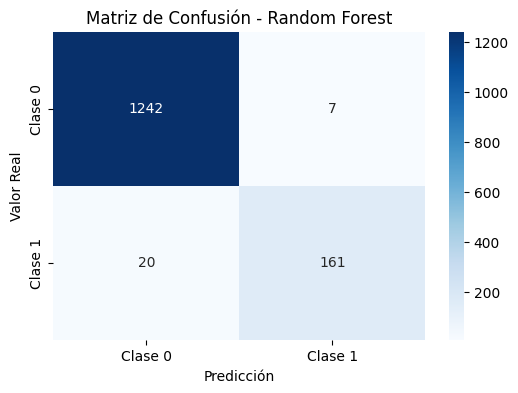

In [52]:
# 7. Método adicional: Random Forest
print("\n6. Random Forest:")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred_rf, random_forest_model = evaluar_modelo(random_forest_model, X_train, X_test, y_train, y_test, "Random Forest")


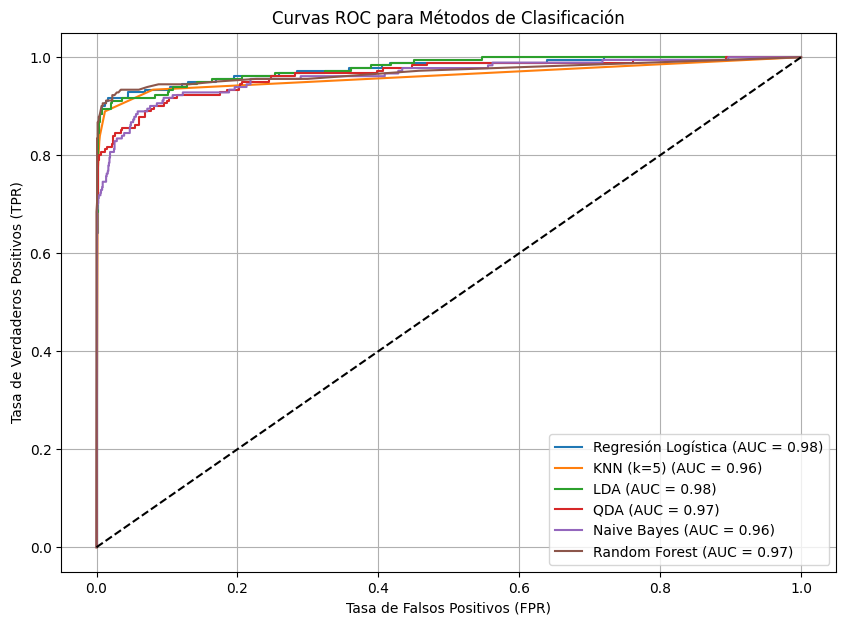

In [53]:
# 8. Graficar curvas ROC
plt.figure(figsize=(10, 7))

# Función para graficar la curva ROC
def graficar_roc(modelo, X_test, y_test, nombre_modelo):
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {auc_score:.2f})')

# Graficar curvas ROC para todos los modelos
graficar_roc(logistic_model, X_test_log, y_test, "Regresión Logística")
graficar_roc(KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train), X_test_scaled, y_test, "KNN (k=5)")
graficar_roc(lda_model, X_test_lda, y_test, "LDA")
graficar_roc(qda_model, X_test_qda, y_test, "QDA")
graficar_roc(naive_bayes_model, X_test, y_test, "Naive Bayes")
graficar_roc(random_forest_model, X_test, y_test, "Random Forest")

# Configuración de la gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Métodos de Clasificación')
plt.legend()
plt.grid(True)
plt.show()